In [1]:

# Importar paquetes
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-06-22 16:12:38.082768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-22 16:12:38.205178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-22 16:12:38.205219: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-22 16:12:38.226348: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-22 16:12:38.986040: W tensorflow/stream_executor/platform/de

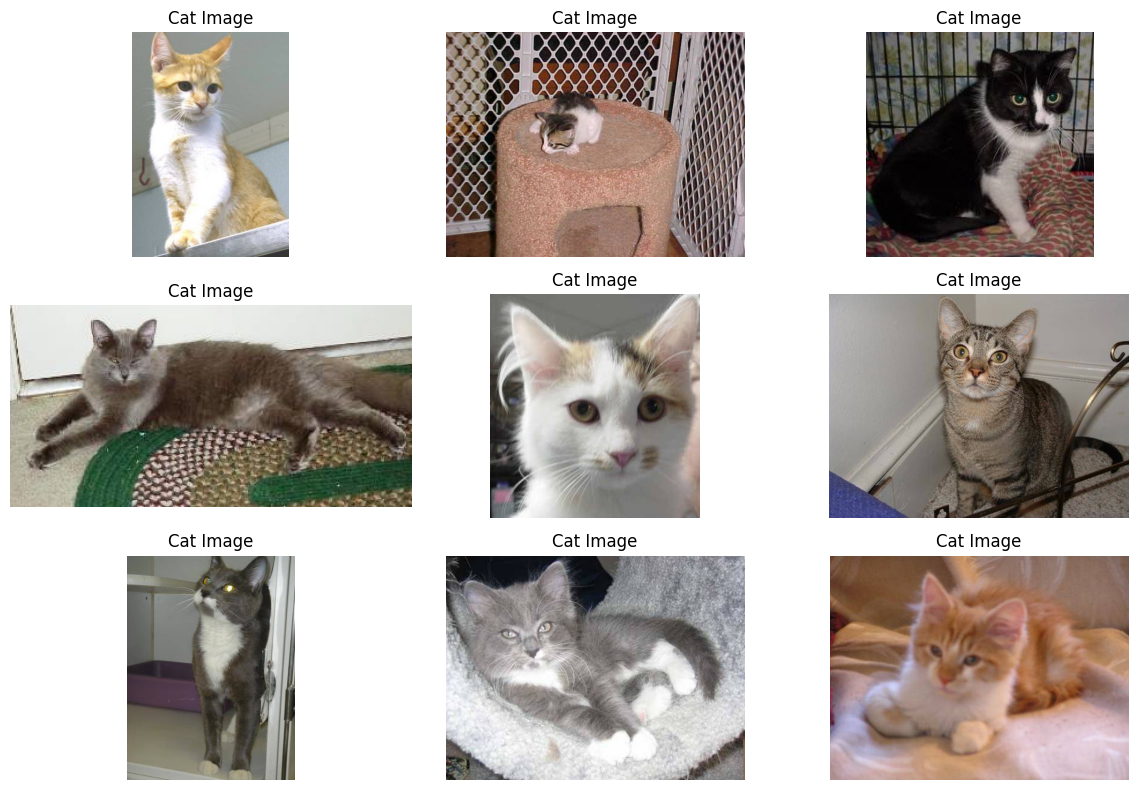

In [2]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Ruta al directorio que contiene los datos de imagen
data_dir = "../data/raw/cat/cat"

# Obtener una lista de todos los nombres de archivos de imagen Cat
#cats_subfolder = os.path.join(data_dir, "cat")
cats_image_files = os.listdir(data_dir)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las primeras 9 imágenes de gato disponibles
    img_path = os.path.join(data_dir, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes de gato
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()


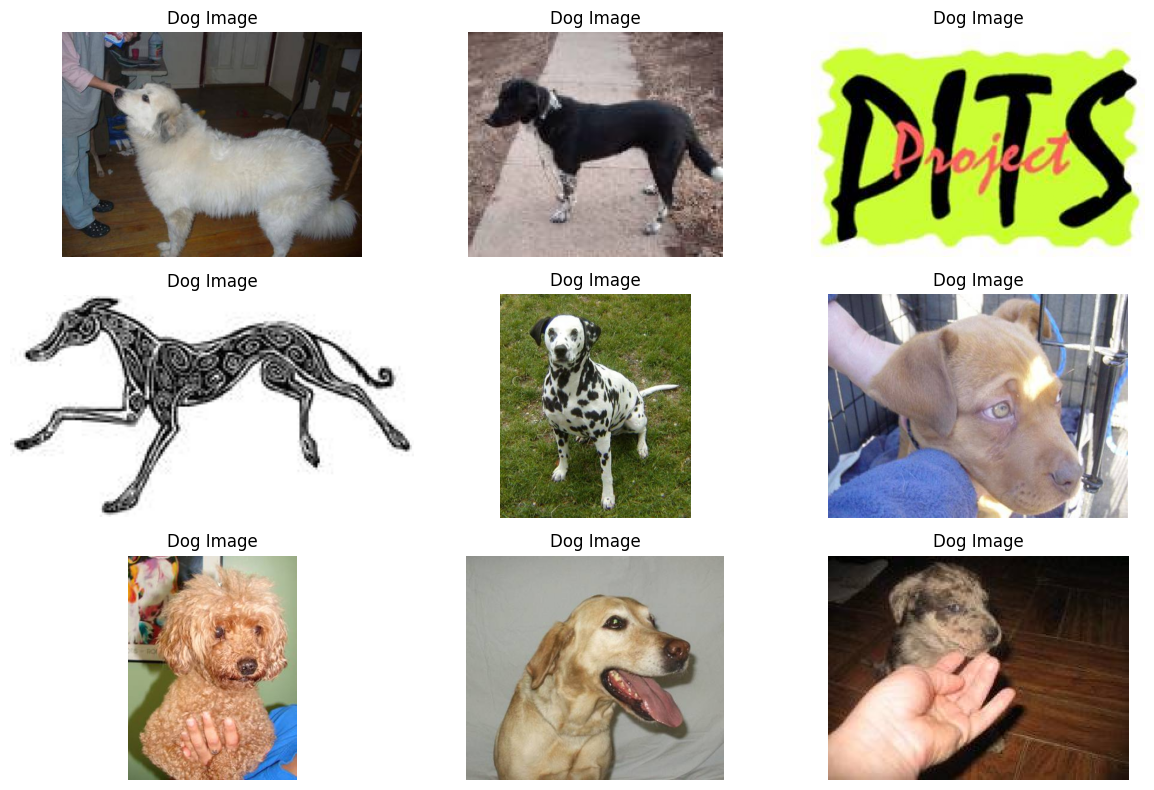

In [3]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Ruta al directorio que contiene los datos de imagen
data_dir_2 = "../data/raw/dog/dog"

# Obtener una lista de todos los nombres de archivos de imagen Cat
#cats_subfolder = os.path.join(data_dir_2, "dog")
dogs_image_files = os.listdir(data_dir_2)

# Cargar las nueve primeras imágenes de perro
dogs_images = []
for i in range(min(9, len(dogs_image_files))):  # Limitar a las primeras 9 imágenes de perro disponibles
    img_path = os.path.join(data_dir_2, dogs_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dogs_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes de perro
plt.figure(figsize=(12, 8))

for i in range(len(dogs_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dogs_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

CREAR Y ENTRENAR MODELO

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
#chatgpt
# Definir algunas reglas para DataGen
train_dir = "../data/raw"
image_size = (200, 200)
batch_size = 8  # Reducido para menor carga en la memoria

# Configuración de ImageDataGenerator con aumentación de datos para entrenamiento
datagentrain = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Usar el 20% de los datos para validación
)

# Configuración de ImageDataGenerator para prueba
datagentest = ImageDataGenerator(rescale=1.0/255.0)

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Usar el conjunto de entrenamiento
)

# Generación de datos de validación
validation_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Usar el conjunto de validación
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"],
    batch_size=batch_size,
    class_mode='categorical'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [5]:
#chatgpt
# Definir el modelo
model = Sequential()
model.add(Conv2D(input_shape=(200, 200, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])


2024-06-22 16:14:28.327360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-22 16:14:28.327397: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-22 16:14:28.327423: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (42d872611883): /proc/driver/nvidia/version does not exist
2024-06-22 16:14:28.327632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
#chatgpt
# Definir los callbacks
checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, mode="auto")
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1, mode="auto")

# Entrenar el modelo
hist = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=3,  # Reducido para pruebas iniciales
    steps_per_epoch=len(train_data) // batch_size,
    validation_steps=len(validation_data) // batch_size,
    callbacks=[checkpoint, early]
)


Epoch 1/3
312/312 [==============================] - ETA: 0s - loss: 0.8267 - accuracy: 0.5417
Epoch 1: val_accuracy improved from -inf to 0.57212, saving model to ../models/vgg16_1.h5
312/312 [==============================] - 122s 391ms/step - loss: 0.8267 - accuracy: 0.5417 - val_loss: 0.6774 - val_accuracy: 0.5721
Epoch 2/3
312/312 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.5841
Epoch 2: val_accuracy improved from 0.57212 to 0.62179, saving model to ../models/vgg16_1.h5
312/312 [==============================] - 118s 378ms/step - loss: 0.6795 - accuracy: 0.5841 - val_loss: 0.6514 - val_accuracy: 0.6218
Epoch 3/3
312/312 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.6106
Epoch 3: val_accuracy improved from 0.62179 to 0.65385, saving model to ../models/vgg16_1.h5
312/312 [==============================] - 118s 378ms/step - loss: 0.6654 - accuracy: 0.6106 - val_loss: 0.6445 - val_accuracy: 0.6538


In [7]:
model.save("../models/vgg16_final.h5")